In [1]:
# Linear Algebra
import numpy as np

# Data preprocessing
import pandas as pd

# Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv("/Users/shauryaluthra/Desktop/Projects/Diabetes Classification/diabetes.csv") # Loading the data

In [3]:
data.info() # Clearly there are no null values and no non numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
293,1,128,48,45,194,40.5,0.613,24,1
547,4,131,68,21,166,33.1,0.160,28,0
646,1,167,74,17,144,23.4,0.447,33,1
397,0,131,66,40,0,34.3,0.196,22,1
316,3,99,80,11,64,19.3,0.284,30,0


In [7]:
# Data dictionary

# Pregnancies - Number of times patient is pregnant
# Glucose - Plasma glucose concentration for 2 hours in an oral glucose tolerance test
# BloodPressure - Diastolic blood pressure in mm Hg
# SkinThickness - Triceps skin fold thickness (mm)
# Insulin - 2-Hour serum insulin (mu U/ml)
# BMI - Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction - the diabetes pedigree function provides a synthesis of the diabetes mellitus history in
#                            relatives and the genetic relationship of those relatives to the subject.
# Age - Age in years
# Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0, 1 denotes patient has diabetes and 0 denotes
#           patient does not have diabetes

In [8]:
# If we clearly look at above row, we see the minimum values of Glucose, BloodPressure, BMI is 0 which is not 
# possible in reality and therefore we remove those rows from our dataset

In [9]:
data_mod = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]

In [10]:
data_mod.shape

(724, 9)

In [11]:
# All rows with Glucose, BloodPressure and BMI = 0 have been removed as seen data.shape command

In [12]:
# It is advisable not to change the original data, instead we should create a new data frame with the required changes
# In case any further changes are required we must do it in newly created data frame

In [13]:
data_mod.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


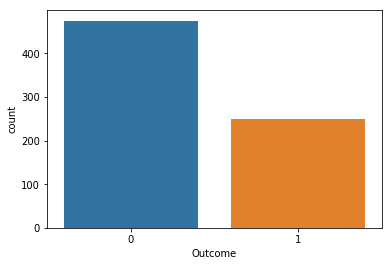

In [14]:
sns.countplot(data_mod['Outcome'], label = "Count")

In [15]:
def boxplot():
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    for i in range (len(columns)):
        data_mod[columns[i]].plot(kind = 'box', subplots = True, sharex = False, sharey = False)
        plt.show()

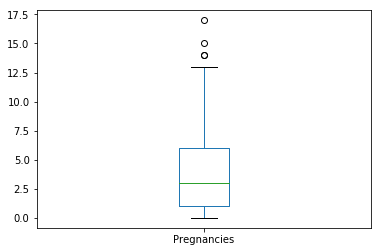

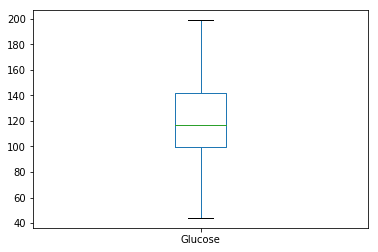

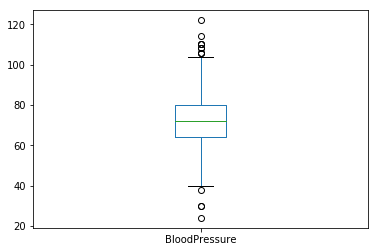

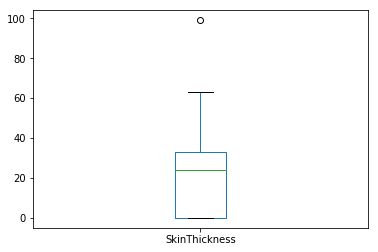

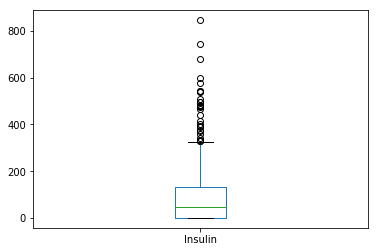

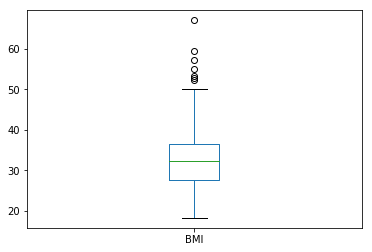

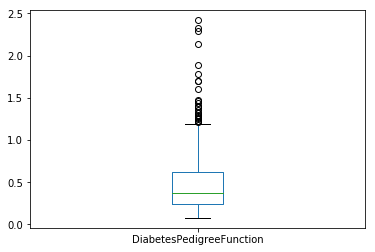

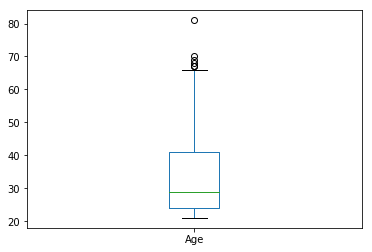

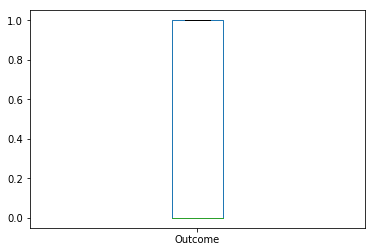

In [16]:
boxplot()

In [17]:
# The small circles outside the box as shown above denote outliers

In [18]:
# We must not drop all the outliers. Sometimes outliers help to make useful predictions. Refer these links on outliers

# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

# We have dropped some outliers, the ones where blood pressure or bmi or glucose is 0. The other outliers seem to 
# be important for us and hence we aren't going to drop them

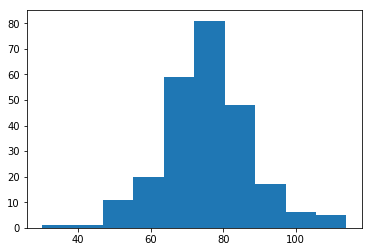

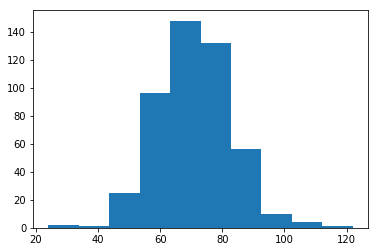

In [19]:
fig = plt.figure(figsize = (6, 4))
ax = plt.hist(data_mod[data_mod['Outcome'] == 1]['BloodPressure']) # Upper histogram
plt.show()
ax = plt.hist(data_mod[data_mod['Outcome'] == 0]['BloodPressure']) # Lower histogram
plt.show()

# The histograms are plotted b/w the BloodPressure on the x axis and number of rows corresponding to that BloodPressure
# on the y axis 

# Similarly histogrmas can be drawn for other columns as shown below

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

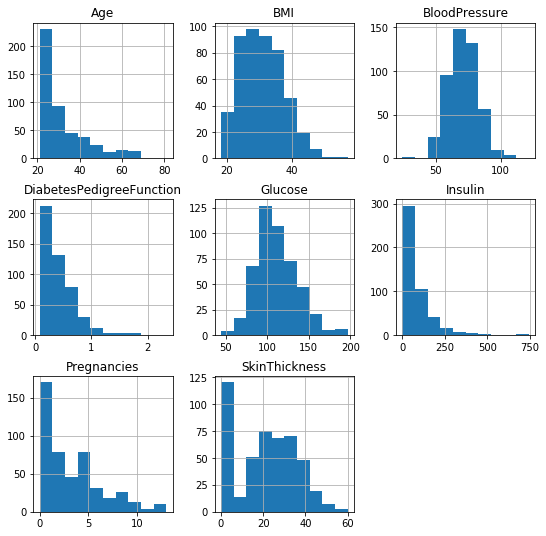

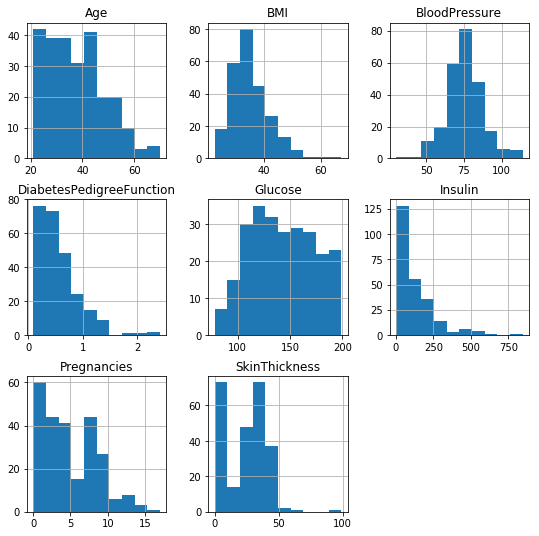

In [20]:
data_mod.groupby('Outcome').hist(figsize = (9, 9))

# This command draws histogram for all columns with the upper histograms representing Outcome = 0 and lower ones 
# representing Outcome = 1

In [21]:
# We'll convert Age column into various categories

In [22]:
data_mod['Age'].describe()

count    724.000000
mean      33.350829
std       11.765393
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [23]:
# The min value of Age is 21 and the max value of Age is 81

In [24]:
data_mod['Age'].value_counts()

22    67
21    59
24    44
25    44
23    35
28    33
26    31
27    31
29    27
31    21
41    19
30    19
42    18
33    17
37    17
32    15
36    15
38    15
45    15
34    14
43    13
46    13
40    12
39    12
35    10
50     8
51     8
52     8
58     7
47     6
44     6
48     5
60     5
57     5
49     5
54     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
70     1
64     1
68     1
69     1
81     1
Name: Age, dtype: int64

In [25]:
#data_mod[(data_mod['Age'] >= 20) & (data_mod['Age'] < 23)].count()  # 126 values b/w 20 and 23
#data_mod[(data_mod['Age'] >= 23) & (data_mod['Age'] < 26)].count()  # 123 values b/w 23 and 26 
#data_mod[(data_mod['Age'] >= 26) & (data_mod['Age'] < 30)].count()  # 122 values b/w 26 and 30
#data_mod[(data_mod['Age'] >= 30) & (data_mod['Age'] < 38)].count()  # 128 values b/w 30 and 38
#data_mod[(data_mod['Age'] >= 38) & (data_mod['Age'] < 47)].count()  # 123 values b/w 38 and 47
#data_mod[(data_mod['Age'] >= 47) & (data_mod['Age'] < 82)].count()  # 102 values b/w 47 and 82

In [26]:
# As seen from above we'll divide Age into 6 categories containing almost equal number of rows

In [27]:
data_mod.loc[(data_mod['Age'] >= 20) & (data_mod['Age'] < 23), 'Age'] = 0
data_mod.loc[(data_mod['Age'] >= 23) & (data_mod['Age'] < 26), 'Age'] = 1
data_mod.loc[(data_mod['Age'] >= 26) & (data_mod['Age'] < 30), 'Age'] = 2
data_mod.loc[(data_mod['Age'] >= 30) & (data_mod['Age'] < 38), 'Age'] = 3
data_mod.loc[(data_mod['Age'] >= 38) & (data_mod['Age'] < 47), 'Age'] = 4
data_mod.loc[(data_mod['Age'] >= 47) & (data_mod['Age'] < 82), 'Age'] = 5

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
data_mod.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
243,6,119,50,22,176,27.1,1.318,3,1
503,7,94,64,25,79,33.3,0.738,4,0
389,3,100,68,23,81,31.6,0.949,2,0
249,1,111,86,19,0,30.1,0.143,1,0
118,4,97,60,23,0,28.2,0.443,0,0


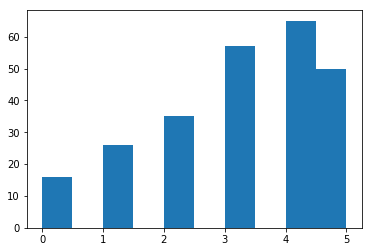

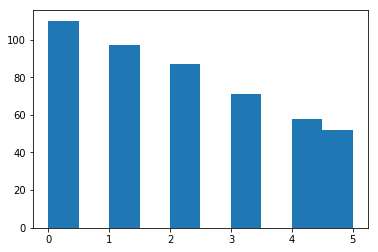

In [29]:
fig = plt.figure(figsize = (6, 4))
ax = plt.hist(data_mod[data_mod['Outcome'] == 1]['Age']) # Upper histogram
plt.show()
ax = plt.hist(data_mod[data_mod['Outcome'] == 0]['Age']) # Lower histogram
plt.show()

In [30]:
features = data_mod.drop(['Outcome'], axis = 1)
outcome = data_mod['Outcome']

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, outcome, test_size = 0.25, random_state = 10)

In [32]:
# Logistic Regression
logreg = LogisticRegression(C = 1)
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# In logistic regression there is parameter C known as regularization parameter. The default value of C = 1. Using
# C = 100 results in a little bit higher accuracy on the training set and little bit lower accuracy on the test set,
# confirming that less regularization and a more complex model may not generalize better than default setting. 

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


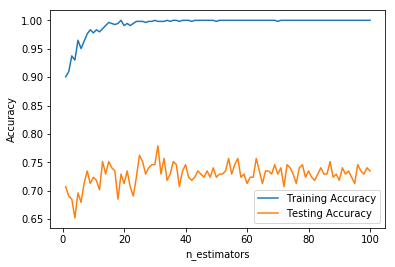

In [33]:
# Plot of n_estimators v/s accuracy for random forest algorithm
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 101)
for n_estimators in neighbors_settings:
    random_forest = RandomForestClassifier(n_estimators = n_estimators)
    random_forest.fit(X_train, y_train)
    training_accuracy.append(random_forest.score(X_train, y_train))
    test_accuracy.append(random_forest.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


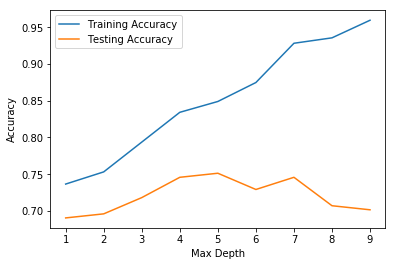

In [34]:
# Plot of max_depth v/s Accuracy for random forest algorithm
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 10)
for max_depth in neighbors_settings:
    random_forest = RandomForestClassifier(max_depth = max_depth)
    random_forest.fit(X_train, y_train)
    training_accuracy.append(random_forest.score(X_train, y_train))
    test_accuracy.append(random_forest.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.legend()
plt.show()

In [35]:
# Random Forest
random_forest = RandomForestClassifier(max_depth = 2, n_estimators = 100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
# n_estimators denotes number of trees. Here number of trees has been set to 100. As a result we are getting a 100%
# accuracy on training set whereas the accuracy on testing set is approx 70%. This is a clear case of overfitting.
# To prevent overfitting we set the max_depth = 3 and get a training accuracy of 80.66% and a testing accuracy of
# 69.06% as shown below

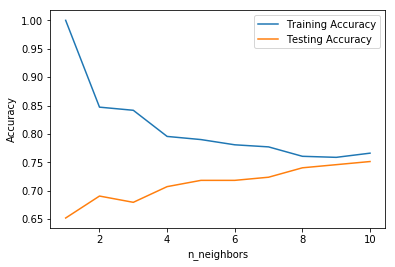

In [36]:
# Plot of n_neighbors v/s Accuracy for knn algorithm
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [37]:
# The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the 
# x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But 
# when more neighbors are considered, the training accuracy drops, indicating that using the single nearest 
# neighbor leads to a model that is too complex. The best performance is somewhere around 8 neighbors.

# The plot suggests that we should choose n_neighbors = 10.

In [38]:
# KNN(k nearest neighbours)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [39]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [40]:
# Perceptron
perceptron = Perceptron(max_iter = 5)
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [41]:
# Linear Support Vector Machine(SVM)
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [42]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
# We set max_depth = 3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the
# training set, but an improvement on the test set.

In [43]:
# Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [44]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gb.fit(X_train, y_train)
Y_pred = gb.predict(X_test)
acc_gb = round(gb.score(X_train, y_train) * 100, 2)
# We have written the parameter max_depth = 1 to prevent overfitting. W/o that parameter we were getting a training
# accuracy of 94.84% and a much lower testing accuracy of 70.72% which is a clear indication of overfitting. Therefore
# we have included the max_depth = 1 parameter. To reduce overfitting we could also reduce the learning rate by 
# setting learning_rate = 0.01 inplace of max_depth = 1

In [45]:
# Now we'll see which is the best model from the above models
results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Stochastic Gradient Descent', 'Naive Bayes', 'Perceptron', 'Decision Tree', 'Gradient Boosting'], 'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_sgd, acc_gaussian, acc_perceptron, acc_decision_tree, acc_gb]})
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
80.85,Gradient Boosting
76.98,Logistic Regression
76.80,Decision Tree
76.61,KNN
76.24,Random Forest
75.14,Naive Bayes
68.51,Support Vector Machines
58.38,Perceptron
46.78,Stochastic Gradient Descent


In [46]:
# Clearly Logistic Regression and Gradient Boosting is the best model with highest training accuracy. But it is not 
# true that the model with highest training accuracy will also have the highest testing accuracy. Sometimes a model
# shows 100% training accuracy but a much lower testing accuracy. This means a model is overfitting. Let us make  
# prediction on our test dataset using all algorithms and see which algorithm has the highest testing accuracy

In [47]:
# Code to plot the importance of each feature in a particular model
def plot_feature_importances_diabetes(model):
    plt.figure(figsize = (8, 6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [48]:
# knn testing accuracy
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7182320441988951
[[97 17]
 [34 33]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       114
           1       0.66      0.49      0.56        67

   micro avg       0.72      0.72      0.72       181
   macro avg       0.70      0.67      0.68       181
weighted avg       0.71      0.72      0.71       181



In [49]:
# knn has a testing accuracy of 71.82%

In [50]:
# Random forest testing accuracy
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.712707182320442
[[103  11]
 [ 41  26]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       114
           1       0.70      0.39      0.50        67

   micro avg       0.71      0.71      0.71       181
   macro avg       0.71      0.65      0.65       181
weighted avg       0.71      0.71      0.69       181



In [51]:
# Random forest has a testing accuracy of 71.27%

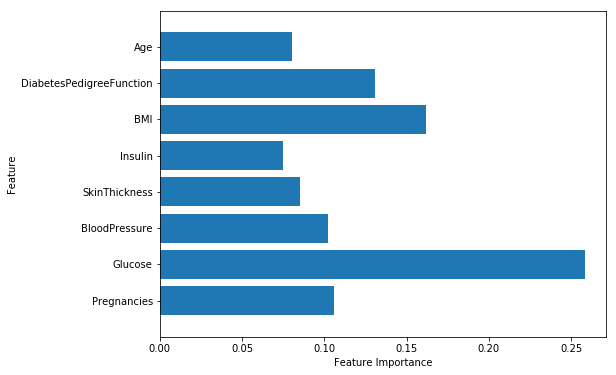

In [52]:
# Random forest feature importance plot
plot_feature_importances_diabetes(random_forest)

In [53]:
# Clearly Glucose is the most important feature and BMI has the second highest importance. The randomness in building
# the random forest forces the algorithm to consider many possible explanations, the result being that the random 
# forest captures a much broader picture of the data than a single tree.

In [54]:
# Decision tree testing accuracy
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7016574585635359
[[93 21]
 [33 34]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       114
           1       0.62      0.51      0.56        67

   micro avg       0.70      0.70      0.70       181
   macro avg       0.68      0.66      0.67       181
weighted avg       0.69      0.70      0.69       181



In [55]:
# Decision tree has a testing accuracy of 70.16%

In [56]:
# Decision Tree feature importance
print("Feature importances:\n{}".format(decision_tree.feature_importances_))

Feature importances:
[0.09254879 0.32442507 0.08005093 0.06257325 0.08522986 0.16802455
 0.12993026 0.05721729]


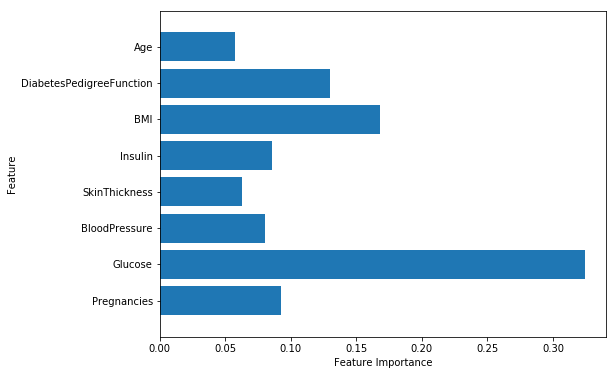

In [57]:
# Decision Tree feature importance plot
plot_feature_importances_diabetes(decision_tree)
plt.show()

In [58]:
# Clearly Glucose is the most important feature

In [59]:
# Logistic regression testing accuracy
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
predictions = logistic_regression.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7569060773480663
[[107   7]
 [ 37  30]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       114
           1       0.81      0.45      0.58        67

   micro avg       0.76      0.76      0.76       181
   macro avg       0.78      0.69      0.70       181
weighted avg       0.77      0.76      0.74       181



In [60]:
# Logistic Regression has a testing accuracy of 75.69%

In [61]:
# Gradient Boosting testing accuracy
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
predictions = gradient_boosting.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7403314917127072
[[101  13]
 [ 34  33]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       114
           1       0.72      0.49      0.58        67

   micro avg       0.74      0.74      0.74       181
   macro avg       0.73      0.69      0.70       181
weighted avg       0.74      0.74      0.73       181



In [62]:
# Gradient boosting has a testing accuracy of 70.71%

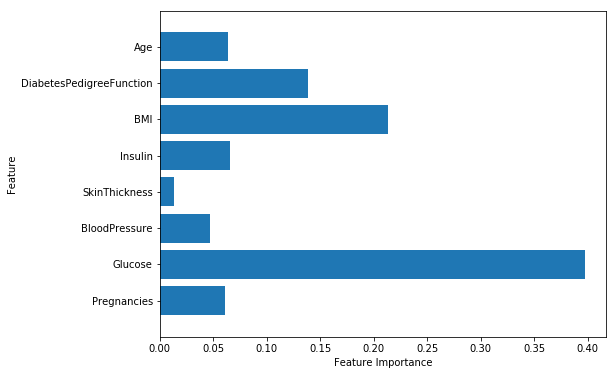

In [63]:
# Gradient boosting feature importance plot
plot_feature_importances_diabetes(gradient_boosting)

In [64]:
# Clearly glucose is the most important feature

In [65]:
# Stochastic Gradient Descent testing accuracy
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
predictions = sgdc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6298342541436464
[[114   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       114
           1       0.00      0.00      0.00        67

   micro avg       0.63      0.63      0.63       181
   macro avg       0.31      0.50      0.39       181
weighted avg       0.40      0.63      0.49       181



/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shauryalut

In [66]:
# Stochastic gradient descent has a testing accuracy of 60.77% which is greater than the training accuracy which
# indicates an exception

In [67]:
# Perceptron testing accuracy
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6187845303867403
[[68 46]
 [23 44]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.66       114
           1       0.49      0.66      0.56        67

   micro avg       0.62      0.62      0.62       181
   macro avg       0.62      0.63      0.61       181
weighted avg       0.65      0.62      0.63       181



/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [68]:
# Perceptron has a testing accuracy of 61.87% which is greater than the training accuracy which indicates an 
# exception

In [69]:
# Naive bayes testing accuracy
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7569060773480663
[[99 15]
 [29 38]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       114
           1       0.72      0.57      0.63        67

   micro avg       0.76      0.76      0.76       181
   macro avg       0.75      0.72      0.73       181
weighted avg       0.75      0.76      0.75       181



In [70]:
# Naive bayes has a testing accuracy of 75.69% which is greater than the training accuracy. This indicates some 
# exception

In [71]:
# SVM testing accuracy
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6298342541436464
[[114   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       114
           1       0.00      0.00      0.00        67

   micro avg       0.63      0.63      0.63       181
   macro avg       0.31      0.50      0.39       181
weighted avg       0.40      0.63      0.49       181



/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/metrics/classi

In [72]:
# SVM has a testing accuracy of 62.98%

In [73]:
# Although Naive Bayes and logistic regression have the highest testing accuracy of approx 75.69% but we will 
# consider only logistic regression because in naive bayes the training accuracy is lower than testing accuracy
# which indicates an exception

In [74]:
data_mod.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
25,10,125,70,26,115,31.1,0.205,4,1
337,5,115,76,0,0,31.2,0.343,4,1
724,1,111,94,0,0,32.8,0.265,4,0
530,2,122,60,18,106,29.8,0.717,0,0
480,3,158,70,30,328,35.5,0.344,3,1
338,9,152,78,34,171,34.2,0.893,3,1
536,0,105,90,0,0,29.6,0.197,4,0
459,9,134,74,33,60,25.9,0.460,5,0
442,4,117,64,27,120,33.2,0.230,1,0
438,1,97,70,15,0,18.2,0.147,0,0


In [75]:
X_new = np.array([[11, 111, 84, 40, 0, 46.8, 0.925, 4]])
prediction = logistic_regression.predict(X_new)
if prediction == 1:
    print("You have diabetes")
else:
    print("You don't have diabetes")

You have diabetes


In [76]:
X_new = np.array([[2, 90, 80, 14, 55, 24.4, 0.249, 1]])
prediction = logistic_regression.predict(X_new)
if prediction == 1:
    print("You have diabetes")
else:
    print("You don't have diabetes")

You don't have diabetes


In [77]:
# Link telling what is good accuracy in ML:

# https://www.coursera.org/lecture/ml-foundations/whats-a-good-accuracy-Dxxoo

In [78]:
# These links have very good information of Diabetes classification and will also help further in classification 
# problems

# https://towardsdatascience.com/machine-learning-for-diabetes-562dd7df4d42
# https://www.kaggle.com/askhanna/diabetes-classification/notebook
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8

In [79]:
# Do try PCA and hyperparameter tuning for increasing accuracy and other methods of increasing accuracy